In [1]:
# -*- coding: utf-8 -*-

import requests
from io import StringIO
import pandas as pd
import numpy as np
import csv
import time
import datetime
import os.path
import os
import sys

import matplotlib.pyplot as plt    # pip install matplotlib
#%matplotlib inline  # check if necessary https://stackoverflow.com/questions/35595766/matplotlib-line-magic-causes-syntaxerror-in-python-script

# 取得股價相關 import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

# 讀取 internet 資料的 subroutines 儲存於 /Dropbox/StockPythonSource/modules/_python_stock_modules_201812.py 
from modules import _python_stock_modules_201812 as stock

# 讀取最新所有股票上市櫃名單 (太常用了, 直接放在準備工作裡, 免得每個模組都需要特別執行一次)
stock_list = stock.get_stock_lists()

print('。。。。。。   完成   。。。。。。')

try:
    twse_r = pdr.get_data_yahoo('^TWII', start=start_date)
except:
    twse = 'NaN'


。。。。。。   完成   。。。。。。


In [2]:
twse_r = pdr.get_data_yahoo('^TWII', start="2017-01-01")

[*********************100%***********************]  1 of 1 downloaded


In [3]:
twse_r.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-14,9737.669922,9762.370117,9677.490234,9708.219727,9708.219727,1315303500
2019-01-15,9701.929688,9806.040039,9701.929688,9806.040039,9806.040039,1658168400
2019-01-16,9781.349609,9803.990234,9763.809570,9763.809570,9763.809570,1742934800
2019-01-17,9773.309570,9826.250000,9759.509766,9789.150391,9789.150391,1585156500
2019-01-18,9781.389648,9842.799805,9771.150391,9836.059570,9836.059570,1499273700


In [53]:
twse = twse_r.iloc[:,3]
delta = twse.diff()
delta[delta < -150]

Date
2017-11-30   -153.109375
2017-12-06   -172.929687
2018-02-05   -179.980469
2018-02-06   -542.250000
2018-02-09   -156.769531
2018-03-23   -182.509766
2018-04-20   -191.839844
2018-06-14   -159.229492
2018-06-19   -183.279297
2018-08-02   -168.360352
2018-08-13   -234.759766
2018-10-05   -201.790039
2018-10-11   -660.719726
2018-10-23   -199.080078
2018-10-25   -238.610352
2018-12-05   -166.799805
2018-12-06   -232.020507
2019-01-02   -173.270508
Name: Close, dtype: float64

In [58]:
delta['2018'].describe()

count    245.000000
mean      -3.736531
std      103.534906
min     -660.719726
25%      -48.099610
50%        2.669921
75%       59.500000
max      293.350586
Name: Close, dtype: float64

In [59]:
delta['2017'].describe()

count    242.000000
mean       5.661076
std       55.135387
min     -172.929687
25%      -26.009765
50%        8.270019
75%       46.207763
max      137.960938
Name: Close, dtype: float64

In [5]:
delta = delta[1:]

In [6]:
delta.describe()

count    500.000000
mean       1.126359
std       83.721809
min     -660.719726
25%      -38.235107
50%        6.384766
75%       49.709717
max      293.350586
Name: Close, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

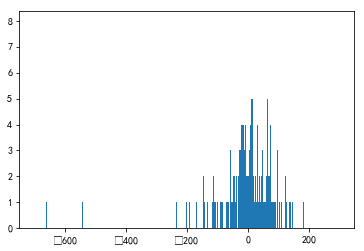

In [12]:
bins = np.arange(-700, 300, 1)

plt.hist(delta, bins=bins)
#plt.hist(delta)

Text(0.5,1,'臺灣家犬累積')

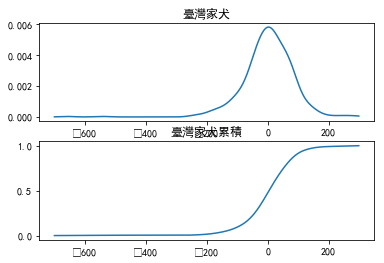

In [13]:
from scipy import stats
density = stats.kde.gaussian_kde(delta)

plt.subplot(211)
plt.plot(bins, density(bins))
plt.title("臺灣家犬")
plt.subplot(212)
plt.plot(bins, density(bins).cumsum())
plt.title("臺灣家犬累積")


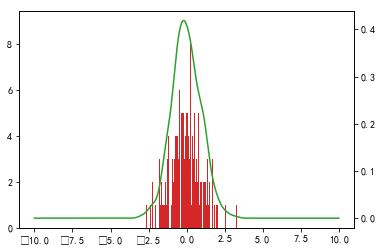

In [38]:
import matplotlib.axes as axes


bins = np.arange(-10, 10, 0.01)

norm = np.random.normal(size = 1000)
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.hist(norm, bins, color=color)

ax2 = ax1.twinx()
color = 'tab:green'
density = stats.kde.gaussian_kde(norm)
ax2.plot(bins, density(bins), color=color)


In [50]:
print(density(0.1), density(-0.1))

[0.39794693] [0.41606349]


In [ ]:
# https://stackoverflow.com/questions/9103166/multiple-axis-in-matplotlib-with-different-scales
# multiple axis in matplotlib with different scales